#### MU4MES03 - Slender Structures - Plates

*DUVIVIER Valentin*

##### Librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

##### Code

In [29]:
## Data

# Material - steel
E  = 210 * 10**9  #[Pa]
nu = 0.3

# Geometry
h  = 1  * 10**-3  #[m]  #beam's thickness
R  = 1   #[m]  #beam's radius
R0 = .2  #[m]  #beam's radius

# Force
P  = -1          #[N]  #distributed loading  #downwards

# ---------------------------------------------

## Solution

r1 = np.linspace(0, R0, 100)
r2 = np.linspace(R0, R, 10)

D = E * h**3 / (12 * (1 - nu**2))

A = P / (64 * D)

#### Coeffs

In [30]:
# We calculate first one and give expression of the following one from previous coeffs

C1_tilde = 8*A*R0**2
C3_tilde = -A * (R0**4/R**2) * (5 + 3*nu + 8*(R**2/R0**2)*np.log(R) * (1+nu))

C2_tilde = -R**2 * (2*C3_tilde + 8*A * R0**2 * (2*np.log(R) + 1))
C4_tilde = - (C1_tilde * R**2 * np.log(R) + C2_tilde * np.log(R) + C3_tilde * R**2)

C3       = (1 / (2 * R0)) * (C1_tilde * R0 * (2*np.log(R0) + 1) + C2_tilde/R0 + 2*C3_tilde * R0 - 4*A * R0**3)
C4       = C1_tilde * R0**2 * np.log(R0) + C2_tilde * np.log(R0) + C3_tilde * R0**2 + C4_tilde - A * R0**4 - C3 * R0**2

##### Displacement

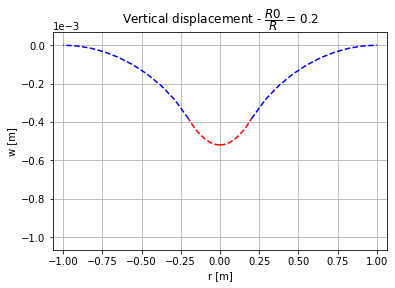

In [46]:
# Solution

w1 = A * r1**4 + C3 * r1**2 + C4
w2 = C1_tilde * r2**2 * np.log(r2) + C2_tilde * np.log(r2) + C3_tilde * r2**2 + C4_tilde

# ---------------------------------------------

plt.figure()

plt.plot(r1, w1, 'r--')
plt.plot(-r1, w1, 'r--')

plt.plot(r2, w2, 'b--')
plt.plot(-r2, w2, 'b--')

plt.title(r'Vertical displacement - $\dfrac{R0}{R}$ = '+f'{R0/R}')
plt.ylabel('w [m]')
plt.xlabel('r [m]')

# ---------------------------------------------

# Normalisation graph
x_lim = R + R/15
y_lim = h + h/15

plt.axis([-x_lim, x_lim, -y_lim, h/15])
plt.ticklabel_format(axis='y', style='scientific', scilimits=(-1, 2))

plt.tight_layout

plt.grid(True)